In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 
 import seaborn as sns
 from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
 from sklearn.model_selection import train_test_split,GridSearchCV
 from sklearn.tree import DecisionTreeClassifier, plot_tree
 from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.shape

(4981, 11)

In [4]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
print(df['gender'].unique())

['Male' 'Female']


In [7]:
df['gender']=df['gender'].map({'Female':0,'Male':1})
df['ever_married']=df['ever_married'].map({'No':0,'Yes':1})
df['Residence_type']=df['Residence_type'].map({'Rural':0,'Urban':1})

In [8]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,Private,0,70.15,29.8,formerly smoked,0
4977,1,40.0,0,0,1,Private,1,191.15,31.1,smokes,0
4978,0,45.0,1,0,1,Govt_job,0,95.02,31.8,smokes,0
4979,1,40.0,0,0,1,Private,0,83.94,30.0,smokes,0


In [9]:
df = pd.get_dummies(columns=['work_type','smoking_status'], data= df, drop_first=True,dtype=int)
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,1,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,1,0,0,0,1,0
2,0,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,1
3,0,79.0,1,0,1,0,174.12,24.0,1,0,1,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,0,70.15,29.8,0,1,0,0,1,0,0
4977,1,40.0,0,0,1,1,191.15,31.1,0,1,0,0,0,0,1
4978,0,45.0,1,0,1,0,95.02,31.8,0,0,0,0,0,0,1
4979,1,40.0,0,0,1,0,83.94,30.0,0,1,0,0,0,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4981 non-null   int64  
 1   age                             4981 non-null   float64
 2   hypertension                    4981 non-null   int64  
 3   heart_disease                   4981 non-null   int64  
 4   ever_married                    4981 non-null   int64  
 5   Residence_type                  4981 non-null   int64  
 6   avg_glucose_level               4981 non-null   float64
 7   bmi                             4981 non-null   float64
 8   stroke                          4981 non-null   int64  
 9   work_type_Private               4981 non-null   int64  
 10  work_type_Self-employed         4981 non-null   int64  
 11  work_type_children              4981 non-null   int64  
 12  smoking_status_formerly smoked  49

In [11]:
print(df['stroke'].value_counts())

stroke
0    4733
1     248
Name: count, dtype: int64


In [12]:
print(df['stroke'].value_counts(normalize=True))

stroke
0    0.950211
1    0.049789
Name: proportion, dtype: float64


<Axes: >

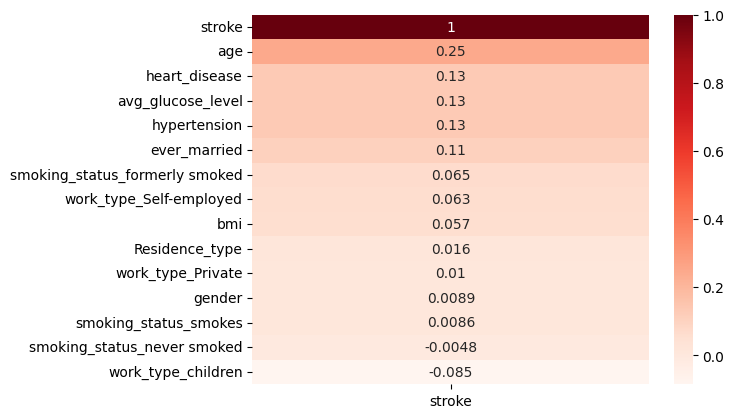

In [13]:
sns.heatmap(df.corr()[['stroke']].sort_values(by='stroke',
                                                     ascending = False),
           annot = True,cmap = 'Reds')

<Axes: xlabel='gender', ylabel='stroke'>

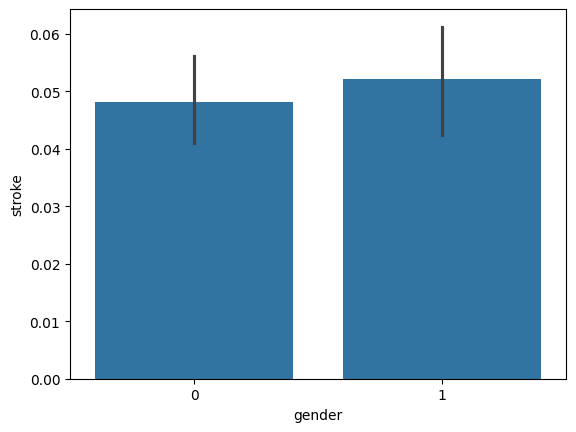

In [14]:
sns.barplot(x='gender',y='stroke',data=df)

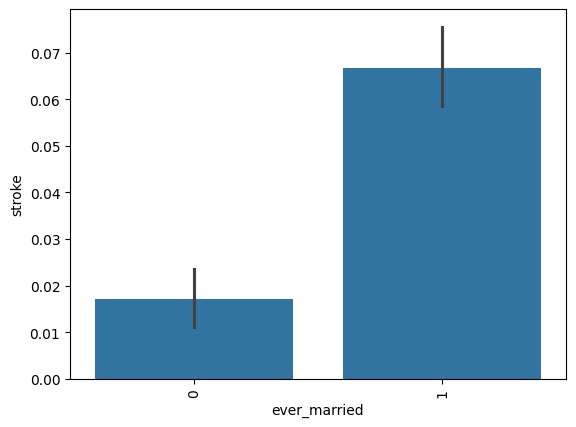

In [15]:
sns.barplot(x='ever_married',y='stroke',data=df)
plt.xticks(rotation=90)
plt.show()

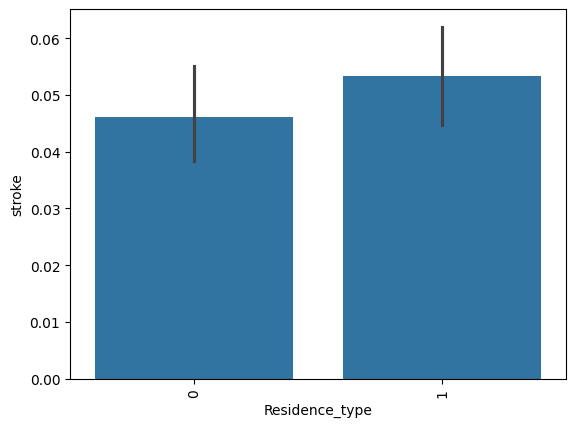

In [16]:
sns.barplot(x='Residence_type',y='stroke',data=df)
plt.xticks(rotation=90)
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4981 non-null   int64  
 1   age                             4981 non-null   float64
 2   hypertension                    4981 non-null   int64  
 3   heart_disease                   4981 non-null   int64  
 4   ever_married                    4981 non-null   int64  
 5   Residence_type                  4981 non-null   int64  
 6   avg_glucose_level               4981 non-null   float64
 7   bmi                             4981 non-null   float64
 8   stroke                          4981 non-null   int64  
 9   work_type_Private               4981 non-null   int64  
 10  work_type_Self-employed         4981 non-null   int64  
 11  work_type_children              4981 non-null   int64  
 12  smoking_status_formerly smoked  49

In [18]:
 # data preparation
x=df.drop('stroke',axis=1)
y=df['stroke']
x

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,0,0,1,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,0,1
3,0,79.0,1,0,1,0,174.12,24.0,0,1,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,0,70.15,29.8,1,0,0,1,0,0
4977,1,40.0,0,0,1,1,191.15,31.1,1,0,0,0,0,1
4978,0,45.0,1,0,1,0,95.02,31.8,0,0,0,0,0,1
4979,1,40.0,0,0,1,0,83.94,30.0,1,0,0,0,0,1


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [20]:
x_sc = sc.transform(x)
x_sc

array([[ 1.1839085 ,  1.04058433, -0.32618577, ...,  2.17832459,
        -0.76471668, -0.42958377],
       [ 1.1839085 ,  1.61427033, -0.32618577, ..., -0.45906841,
         1.30767384, -0.42958377],
       [-0.84465987,  0.24624988, -0.32618577, ..., -0.45906841,
        -0.76471668,  2.32783471],
       ...,
       [-0.84465987,  0.06973111,  3.06573766, ..., -0.45906841,
        -0.76471668,  2.32783471],
       [ 1.1839085 , -0.15091734, -0.32618577, ..., -0.45906841,
        -0.76471668,  2.32783471],
       [-0.84465987,  1.61427033,  3.06573766, ..., -0.45906841,
         1.30767384, -0.42958377]])

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, train_size = 0.8, random_state= 15,
                                                   stratify=y)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3984, 14)
(997, 14)
(3984,)
(997,)


In [23]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=15)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Now train the model using the resampled dataset



In [24]:
new_dt = DecisionTreeClassifier()
new_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 20)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_


In [26]:
print("Best Parameters:", grid_search.best_params_)
print("Best Training Score:", grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': np.int64(17)}
Best Training Score: 0.9058389247114936


In [27]:
y_pred_best = best_model.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nAccuracy:", accuracy_score(y_test, y_pred_best))


Confusion Matrix:
 [[839 108]
 [ 37  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       947
           1       0.11      0.26      0.15        50

    accuracy                           0.85       997
   macro avg       0.53      0.57      0.54       997
weighted avg       0.92      0.85      0.88       997


Accuracy: 0.8545636910732196


In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
best_model = DecisionTreeClassifier(criterion='entropy', max_depth=19)

In [29]:
best_model.fit(x_train_resampled, y_train_resampled)
best_model.score(x_train_resampled, y_train_resampled)

0.993660855784469

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_best = best_model.predict(x_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_best))


Confusion Matrix:
 [[835 112]
 [ 40  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92       947
           1       0.08      0.20      0.12        50

    accuracy                           0.85       997
   macro avg       0.52      0.54      0.52       997
weighted avg       0.91      0.85      0.88       997


Test Accuracy: 0.847542627883651


In [31]:
best_model.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [32]:
new_data = [[1,59.00,0,0,1,0,76.15,30.2,1	,0,	0,	0,	0,	0]]
sc_newdata=sc.transform(new_data)
best_model.predict(sc_newdata)

c:\Users\AZAM KHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [33]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3409,0,31.0,0,0,1,0,108.64,43.3,0,0,1,0,0,1,0
1226,0,56.0,0,1,1,0,64.66,26.7,0,1,0,0,1,0,0
4780,0,61.0,0,0,1,0,202.21,31.6,1,0,1,0,0,1,0
2825,0,37.0,0,0,1,0,101.07,26.4,0,1,0,0,0,0,0
779,0,40.0,0,0,1,0,74.51,36.6,0,1,0,0,0,1,0


In [34]:
import pickle
 

# Save the trained model
with open("stroke_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)


with open("brain_stroke_scaler.pkl", "wb") as scaler_file:
    pickle.dump(sc, scaler_file)

